In [1]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


female    233
male      109
Name: Sex, dtype: int64
     female  male
Sex     233   109
Sex      81   468


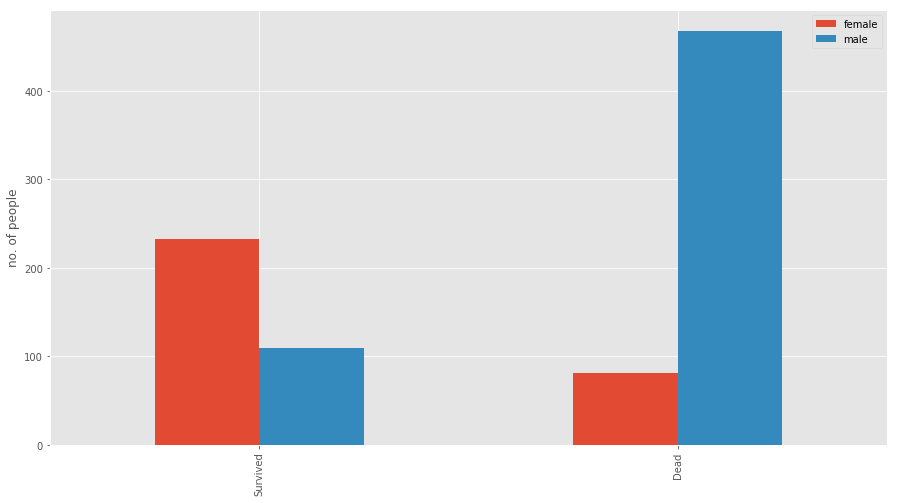

In [6]:
survived_sex = data[data['Survived']==1]['Sex']

print(survived_sex.value_counts())
survived_sex = survived_sex.value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
#plot the survived male , female and dead male,female

df = pd.DataFrame([survived_sex,dead_sex])
print(df)
df.index = ['Survived','Dead']
ax = df.plot(kind='bar', figsize=(15,8))
ax.set_ylabel("no. of people")

In [7]:
'''
dta = []
bhavin =[]
for i in range(10,90,10):
    dta.append(data[(data['Survived'] == 1) & (data['Age']>i-10) & (data['Age']<=i)]['Age'].value_counts().index.tolist())
arr = np.array(dta)
print arr.shape
'''
df = data[data['Survived']==1]['Age']
pf = data[data['Survived']==0]['Age']
dead = pf.tolist()
survived = df.tolist()

#ages = df.Age
#print ages


In [8]:
'''dta = []
for i in range(0,80,10):
    dta.append(data[(data['Survived'] == 1) & (data['Age']>i-10) & (data['Age']<i)]['Age'].index.tolist())
for i in range(len(dta)): 
    print len(dta[i])

df = data[data['Survived']==1]['Age']
range1 = np.arange(0,90,10)
bind = pd.cut(df,range1)
#print bind
new = ['({0}-{1})'.format(x,x+10) for x in range1]
agegroup = pd.value_counts(bind).reindex(new)
print agegroup

dist = pd.DataFrame({'count':agegroup})
print dist
'''

"dta = []\nfor i in range(0,80,10):\n    dta.append(data[(data['Survived'] == 1) & (data['Age']>i-10) & (data['Age']<i)]['Age'].index.tolist())\nfor i in range(len(dta)): \n    print len(dta[i])\n\ndf = data[data['Survived']==1]['Age']\nrange1 = np.arange(0,90,10)\nbind = pd.cut(df,range1)\n#print bind\nnew = ['({0}-{1})'.format(x,x+10) for x in range1]\nagegroup = pd.value_counts(bind).reindex(new)\nprint agegroup\n\ndist = pd.DataFrame({'count':agegroup})\nprint dist\n"

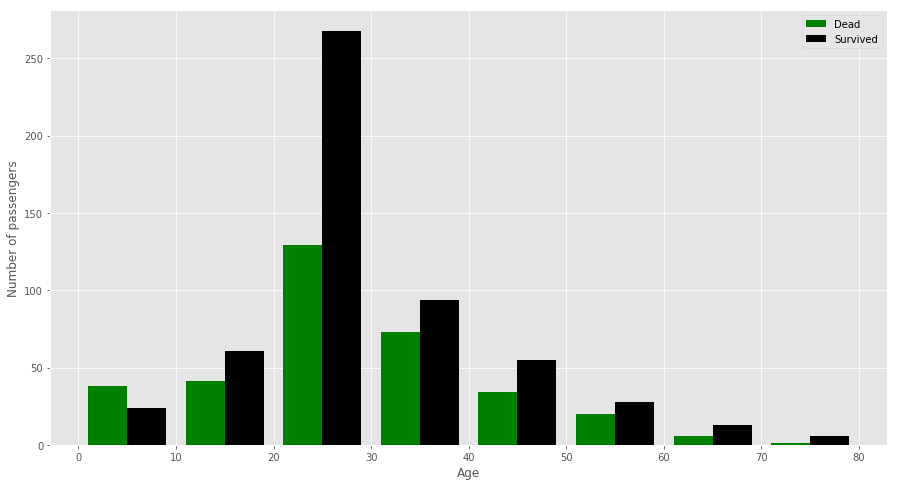

In [9]:
figure = plt.figure(figsize=(15,8))
bi = [0,10,20,30,40,50,60,70,80]
plt.hist([survived,dead],color = ['g','k'],histtype='bar',bins = bi,rwidth=0.8,label = ['Dead','Survived'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig("agevssurvive.png", dpi=100)

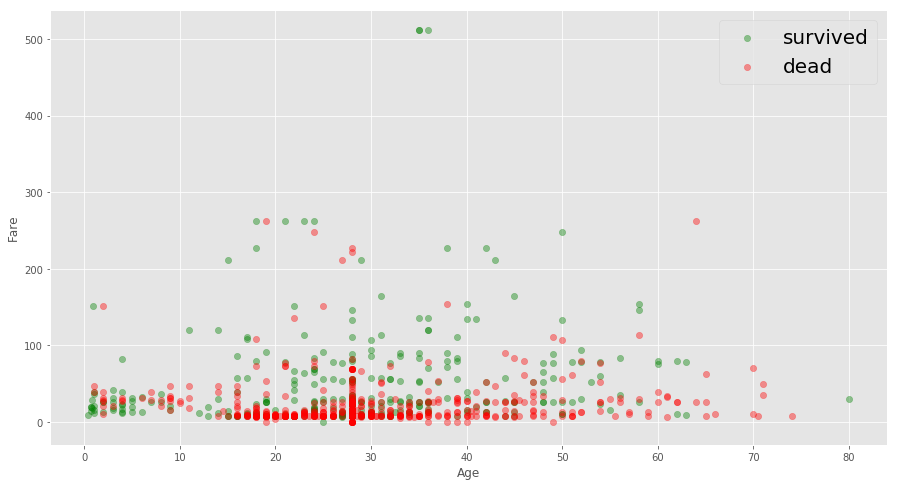

In [10]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40, alpha=0.4)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40,  alpha=0.4)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=20,)
plt.savefig("farevsage.png", dpi=100)

In [12]:
# Combining both the test and trainig data so that all the manipulations which are done
# happen on both the data sets.
# Also if test set has any missing values, it will easily come to notice here
def get_combined_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    combined = train.append(test)
    
    combined.reset_index(inplace=True)
    
    combined.drop('index',inplace=True,axis=1)
    return combined
combined = get_combined_data()
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None


In [13]:
combined.Cabin.fillna('U',inplace=True)
combined.Embarked.fillna('S',inplace=True)
combined.Fare.fillna(data.Fare.mean(),inplace=True)
combined.Age.fillna(data.Age.median(), inplace=True)

In [14]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
combined['Alone'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
combined['Small'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
combined['Large'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Small,Large
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,1,0,0


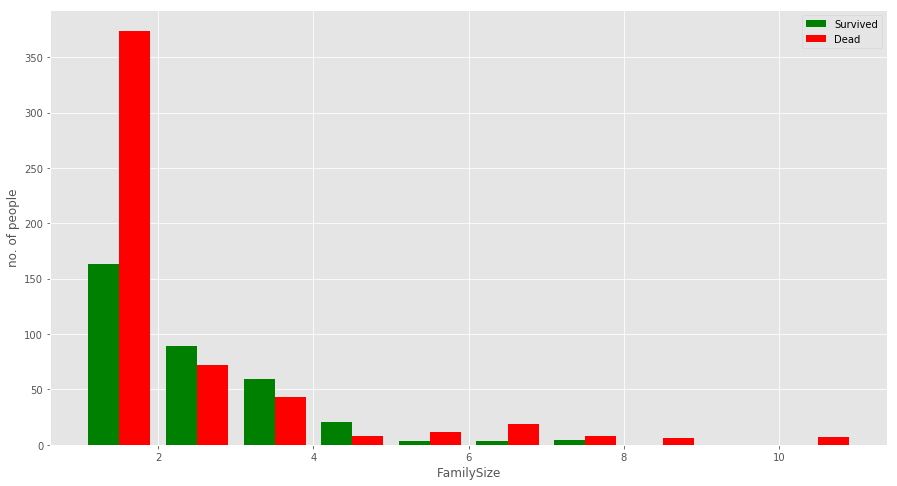

In [24]:
# The size of families on the training set
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
figure=plt.figure(figsize=(15,8))
plt.ylabel('no. of people')
plt.xlabel('FamilySize')
plt.hist([data[data['Survived']==1]['FamilySize'],data[data['Survived']==0]['FamilySize']],color = ['g','r'],label = ['Survived','Dead'])
plt.legend()
plt.savefig("familysize.png", dpi=100)

In [14]:
if 'Title' not in combined.columns:
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    combined['Title'] = combined.Title.map(Title_Dictionary)
    combined.drop('Name',axis=1,inplace=True)
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    
    combined.drop('Title',axis=1,inplace=True)
    combined = pd.concat([combined,titles_dummies],axis=1)
print titles_dummies.head()

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Officer  Title_Royalty
0             0           0         1          0              0              0
1             0           0         0          1              0              0
2             0           1         0          0              0              0
3             0           0         0          1              0              0
4             0           0         1          0              0              0


In [15]:
data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
data['Title'] = data.Title.map(Title_Dictionary)
data = pd.concat([data,pd.get_dummies(data['Title'],prefix='Title')],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,0,0,1,0,0,0


In [16]:
# 10-20, 20-30 something like that
#combined.drop(['20-40','70-80','below-80'],inplace=True,axis=1)
combined['0-20'] = combined['Age'].map(lambda x: 1 if x>=0 and x<=20 else 0)
combined['20-60'] = combined['Age'].map(lambda x: 1 if x>20 and x<=60 else 0)
combined['60-80'] = combined['Age'].map(lambda x: 1 if x<60 and x<=80 else 0)
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Small,Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,0-20,20-60,60-80
0,1,3,male,22.0,1,0,A/5 21171,7.2500,U,S,2,0,1,0,0,0,1,0,0,0,0,1,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0,0,0,1,0,0,0,1,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,1,0,0,0,1,0,0,0,0,0,1,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,2,0,1,0,0,0,0,1,0,0,0,1,1
4,5,3,male,35.0,0,0,373450,8.0500,U,S,1,1,0,0,0,0,1,0,0,0,0,1,1


In [17]:
def get_one_hot_encoding(dt, features):
    for feature in features:
        if feature in dt.columns:
            dummies = pd.get_dummies(dt[feature],prefix=feature)
            dt = pd.concat([dt,dummies],axis=1)
    return dt

In [18]:
print combined.head()
combined = get_one_hot_encoding(combined,['Embarked','Cabin','Pclass','Embarked','Title'])
combined['Sex'] = combined['Sex'].map(lambda x : 1 if x == "female" else 0)
combined.drop(['Embarked','Cabin','Pclass','Embarked','Title'],inplace=True,axis=1)

   PassengerId  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    male  22.0      1      0         A/5 21171   7.2500   
1            2       1  female  38.0      1      0          PC 17599  71.2833   
2            3       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1  female  35.0      1      0            113803  53.1000   
4            5       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  FamilySize  Alone  Small  Large  Title_Master  Title_Miss  \
0     U        S           2      0      1      0             0           0   
1   C85        C           2      0      1      0             0           0   
2     U        S           1      1      0      0             0           1   
3  C123        S           2      0      1      0             0           0   
4     U        S           1      1      0      0             0           0   

   Title_Mr  Title_Mrs  Title_Officer 

In [19]:
def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        
        ticket = filter(lambda t : not t.isdigit(), ticket)
        
        ticket = list(ticket)
        if (len(ticket)) > 0:
            
            return ticket[0]
        else: 
            return 'XXX'

combined['Ticket'] = combined['Ticket'].map(cleanTicket)
combined['Ticket'].head()

0        A5
1        PC
2    STONO2
3       XXX
4       XXX
Name: Ticket, dtype: object

In [20]:
def get_one_hot_encodings1(dt, features):
    
    #print(features)
    if features in dt.columns:
        dummies = pd.get_dummies(dt[features],prefix=features)
        #print dummies
        dt = pd.concat([dt,dummies],axis=1)
    return dt
combined = get_one_hot_encodings1(combined,'Ticket')
print combined.head()

combined.drop('Ticket',axis=1,inplace=True)

   PassengerId  Sex   Age  SibSp  Parch  Ticket     Fare  FamilySize  Alone  \
0            1    0  22.0      1      0      A5   7.2500           2      0   
1            2    1  38.0      1      0      PC  71.2833           2      0   
2            3    1  26.0      0      0  STONO2   7.9250           1      1   
3            4    1  35.0      1      0     XXX  53.1000           2      0   
4            5    0  35.0      0      0     XXX   8.0500           1      1   

   Small  Large  Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Officer  \
0      1      0             0           0         1          0              0   
1      1      0             0           0         0          1              0   
2      0      0             0           1         0          0              0   
3      1      0             0           0         0          1              0   
4      0      0             0           0         1          0              0   

   Title_Royalty  0-20  20-60  60-80  

In [21]:
columns = combined.columns
combined_new = pd.DataFrame(preprocessing.normalize(combined, axis=0, copy=True), columns=columns)
combined_new['PassengerId'] = combined['PassengerId']
combined = combined_new
print combined.head()

   PassengerId       Sex       Age     SibSp  Parch      Fare  FamilySize  \
0            1  0.000000  0.018884  0.023939    0.0  0.003258    0.022465   
1            2  0.046324  0.032618  0.023939    0.0  0.032031    0.022465   
2            3  0.046324  0.022317  0.000000    0.0  0.003561    0.011232   
3            4  0.046324  0.030043  0.023939    0.0  0.023861    0.022465   
4            5  0.000000  0.030043  0.000000    0.0  0.003617    0.011232   

      Alone     Small  Large  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0  0.000000  0.047836    0.0           0.0     0.00000  0.036346   0.000000   
1  0.000000  0.047836    0.0           0.0     0.00000  0.000000   0.070711   
2  0.035578  0.000000    0.0           0.0     0.06178  0.000000   0.000000   
3  0.000000  0.047836    0.0           0.0     0.00000  0.000000   0.070711   
4  0.035578  0.000000    0.0           0.0     0.00000  0.036346   0.000000   

   Title_Officer  Title_Royalty  0-20     20-60     60-80  Emb

In [22]:
train0 = pd.read_csv('train.csv')
targets = train0.Survived
train = combined[0:891]
#train = train.drop('PassengerId',axis=1,inplace=False)

test = combined[891:]
#test = test.drop('PassengerId',axis=1,inplace=False)

In [23]:
clf = RandomForestClassifier(n_estimators=200)
clf = clf.fit(train, targets)
features = pd.DataFrame()

features['feature'] = train.columns

#features.drop('PassengerId',axis=1,inplace=True)
features['importance'] = clf.feature_importances_
#pd.options.display.max_columns = 50

cols =  features.sort_values(['importance'],ascending=False)[['importance','feature']]
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
test_new = model.transform(test)

In [24]:
cols

,importance,feature
0,0.130976,PassengerId
5,0.120906,Fare
2,0.108381,Age
1,0.091230,Sex
12,0.089845,Title_Mr
13,0.038328,Title_Mrs
11,0.036797,Title_Miss
211,0.031052,Pclass_3
6,0.027658,FamilySize
208,0.026124,Cabin_U


In [28]:
train_new.shape


(891L, 28L)

In [29]:
import xgboost as xg


ImportError: No module named xgboost

In [26]:

forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9],
                 'n_estimators': [100, 200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


Best score: 0.832772166105
Best parameters: {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 5}


In [27]:
test_predictions = grid_search.predict(test_new)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = test_predictions
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)

In [28]:
ext = ExtraTreesClassifier()

parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9],
                 'n_estimators': [100, 200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(ext,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.833894500561
Best parameters: {'n_estimators': 240, 'criterion': 'gini', 'max_depth': 5}


In [39]:
lr = LogisticRegression(penalty='l2')

parameter_grid = {
                 'tol' : [0.1,0.01,0.001,10,1],
                 'max_iter': [100, 200,210,240,250],
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = RandomizedSearchCV(lr,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

TypeError: __init__() got an unexpected keyword argument 'param_grid'